# Objectif: classifier les Iris en trois categories
1.       Check for identifiable clusters in the data
2.       Assess the accuracy of these clusters based on species
3.       Build a model to predict the species of samples
4.       Asses the accuracy of the model’s predictions based on actual species
5.       Assess the model’s ability to predict each species
6.       Assess the accuracy of the model to predict out of sample data

# Analyse donnée 

-> nous avons des données étiquetées : 4 attributs numerique, 1 target categorial, 150 samples

attributs: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
targets: species, discret => apprentissage supervisé, problème de classification

-> les trois classes sont également répresentées dans l'ensemble d'apprentissage
-> nous n'avons pas des valeurs manquants

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count      150.000000    150.000000     150.000000    150.000000   
unique            NaN           NaN            NaN           NaN   
top               NaN           NaN            NaN           NaN   
freq              NaN           NaN            NaN           NaN   
mean         5.843333      3.054000       3.758667      1.198667   
std          0.828066      0.433594       1.764420      0.763161   
min          4.300000      2.000000       1.000000      0.100000   
25%          5.100000      2.800000       1.600000      0.300000   
50%          5.800000      3.000000   

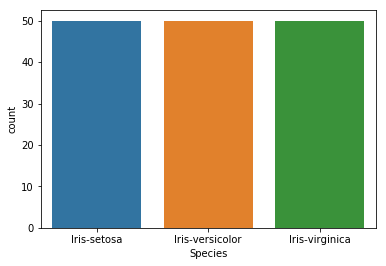

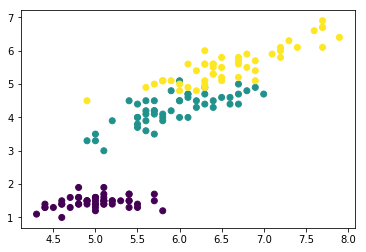

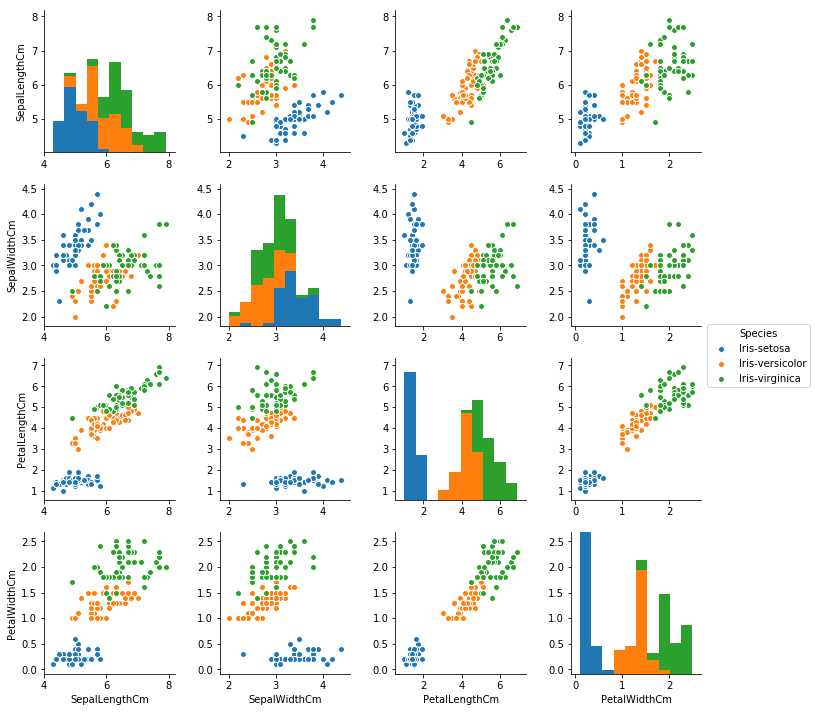

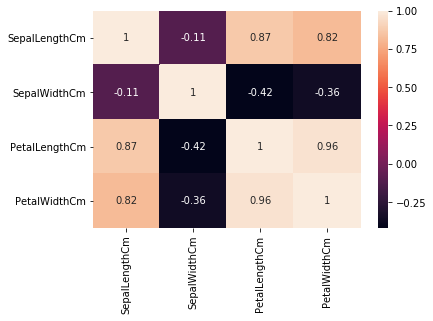

In [2]:
#############
# packages ##
#############
# algebra
import numpy as np

# data treatment
import pandas as pd

# data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

###############
# import data #
###############
data_o = pd.read_csv('Iris.csv')
data_o = data_o.drop('Id', axis = 1)

###########################
# print data informations #
############################
print(data_o.info())
print(data_o.describe(include = 'all'))
print(data_o.pivot_table(index = 'Species', values = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], aggfunc = np.mean))


######################
# data visualisation #  
######################
# are classes balanced ?
sns.countplot('Species', data = data_o) 

# scatterplots
le = LabelEncoder()
fig, ax = plt.subplots()
species_e = le.fit_transform(data_o['Species'])
ax.scatter(data_o['SepalLengthCm'], data_o['PetalLengthCm'], c = species_e)
sns.pairplot(data_o, hue = 'Species')

fig2, ax2 = plt.subplots()
# correlations 
corr_matrix = data_o.corr()
sns.heatmap(corr_matrix, annot = True, ax = ax2)


# conclusion analyse des donnée 

# question à poser au métier

# Preprocessing and Modeling

-> choix de l'algorithm: penalized logistic regression with penality l2, use cross validation to optimize C 

-> preprocessing, standardScaler aux attributs


{'C': 30}
LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.973684210526


Text(33,0.5,'Actual values')

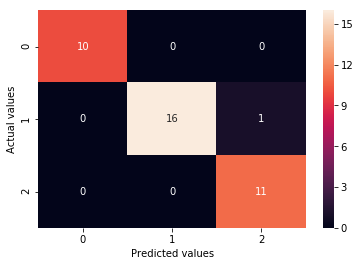

In [4]:
# split data in test and learn datasets
data_X = data_o.drop('Species', axis = 1)
data_y = data_o['Species']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y)

# data preprocessing 
ss = StandardScaler()
ss.fit_transform(train_X)
ss.transform(test_X)

LR_model = LogisticRegression()
param_grid = { 'C' : [0.6, 1, 10, 30, 40] }
cv = KFold(n_splits = 30, shuffle = True)
LR_CV = GridSearchCV(estimator = LR_model, param_grid = param_grid, cv = cv )
LR_CV.fit(train_X, train_y)
predict_y = LR_CV.predict(test_X)
print(LR_CV.best_params_)
print(LR_CV.best_estimator_)
#############################
# evaluation de l'algorithm #
#############################
print(accuracy_score(test_y, predict_y))

conf_matrix = confusion_matrix(test_y, predict_y)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Recommandation
Est-ce que on peut introduire une autre feature qui peut nous aider à discerner les classes 1 et 2 ? 